# Aula 6 - BigData Algorithms
---

## TODAY

- Filtering DataStreaming  - **Bloom Filtering**
- Matrix vector Multiplication (e.g. Page Rank) - **Power Iteration**
- Window Counting - **DGIM Method**
- Counting Distinct Occorrences - **Flajolet-Martin**



---

# BLOOM FILTERS

## Question: Filtering a data stream by elements existing in other set

---


## 1st Method: Hash table Method
This is the "obvious solution" (given before!)



> - Given a set of keys **S** **(valid emails)** that we want to filter
> - Create a bit array **B** of **n bits** (1GB means 8E9 bits), initially all 0s
> - Choose a hash function $h$ with range **[0,n)**
> - Hash each member of s ∈ S to one of n buckets, and set that bit to 1, i.e., B[h(s)]=1   

You have now the filter Ready. Let's Start Sending emails to the filter:

> - For each new email **a** in the stream, Hash it as h(a)
> - **Output a if B[h(a)] == 1**


<img src="images/hash_filter.png" style="width:60%"/>


### Hash Table Results

**It creates false positives but no false negatives**

- |S| = 1 billion email addresses 
- |B|= 1GB = 8 billion bits

If the email address is in S, then it surely hashes to a bucket that has the big set to 1, so it always gets through (no false negatives)

**Approximately 1/8 of the bits are set to 1, so about 1/8th of the addresses not in S get through to the output (false positives)**

Actually, less than 1/8th, because more than one address might hash to the same bit.

---

## 2nd Method: Bloom Filter

**Method Description: **

- Use $k$ independent hash functions $h_1 ,..., h_k$
- $|S| = m$ (Valid email addresses)
- $|B| = n$ (Hash Filter array)


- INITIALIZE
    - Set $B$ to all $0s$
    - Hash each element $s∈S$ using each hash function hi, set $B[h_i(s)]=1$ (for each $i=1,..,k$)

> Remember: There is just 1 B array!


- RUNTIME
    - When a stream element with key $x$ (new email!) arrives, If $B[h_i(x)]=1$ **for all i=1,...,k** - That is, if $x$ hashes to a bucket set to $1$ for every hash function $h_i(x)$ - then declare that $x$ is in $S$ 
    - Otherwise discard the element x
---

<img src="images/bloom_filter.png" style="width:40%"/>

----


#### Bloom Filter False Positive Analisys

m= 1 US billion (S)
n= 8 US billion (B)

- k=1: (Hash function): 0.1175 (about 1/8th)
- k=2: 0.0493
- k=6: 0.0235 (Optimum)

**Only 2% false positive instead of ~12% (Hash function)**

#### Bloom Filter Wrap-up

- No false negatives
- Great for pre-processing before more expensive checks
- **Only 2% false positive instead of ~12% (Hash function)**

---

# POWER ITERATION

## Matrix vector Multiplication (e.g. Page Rank) - 

  

As we saw before, Gaussian elimination method works for small examples, but we need a better method for large web-size graphs


So, for a single page $j$, its importance $r_j$ is given by:

$$r_j = \sum_{i=1}^{I} \frac{r_i}{n_i}$$

---

Take a first set of 3 nodes:

<img src="images/page_rank.png" style="width:30%"/>


Could be written as 

$$r_y =r_y/2+r_a/2 $$

$$r_a =r_y/2+r_m$$ 

$$r_m =r_a /2$$


We have to add an extra relation between parameters: for instance, a normalization information their relative values like $ y+a+m = 1$, which means a = 1-y-m. 



$$ 
\begin{bmatrix} 
1/2 & -1/2 & 0\\
-1/2 & 1 & -1\\
1/2 & 0 & 3/2\\
\end{bmatrix}
\quad
\begin{bmatrix} 
y\\
a\\
m\\
\end{bmatrix} = 
\begin{bmatrix} 
0\\
0\\
1/2\\
\end{bmatrix}$$



### What about if this matrix is HUGE?

To solve this problem let's move back again to the original formulation and consider the matrix $M$ with dimensions D by D where D = number of web pages and  where $M_{ij}$ is given by 

``` If i == j then ```  

$ \space\space\space M_{ij} = 1/d_i$

``` else```

$ \space\space\space M_{ij} =  0$

where $d_i$ are the number of outbound links;

This is exactly the right side of 


$$r_y =r_y/2+r_a/2 $$

$$r_a =r_y/2+r_m$$ 

$$r_m =r_a /2$$

This relations are called the **flow equations** and they could be written as 

$$r = Mr$$

where $r = [r_a r_y r_m]^T$ which are the page ratings.

Suppose page $i$ links to 3 pages, including $j$, we the flow eqution states that $r_j = \sum_{i=1}^{I} \frac{r_i}{n_i}$.


<img src="images/flow_equation.png" style="width:60%"/>


If $Mr = r$ this means $Mr = Ir = \lambda r$

This means $r$ is a so called eigenvector of $M$ 
Actually, since $||\sum_i(M_{ij})|| < 1$ (due to normalization) and since $\lambda=1$, then $r$ is the biggest eigenvalue of $M$.

> $x$ is an eigenvector of $A$ if $Ax = \lambda x$ where $\lambda$ is a real constant 

----

## Power iteration: 
### A simple iterative scheme to solve find the dominant eigenvector (r)

- Suppose there are N web pages
- Initialize: $r^{(0)} = [1/N,....,1/N]^T$

> This means all rankings are considered equal at the begining.

- Iterate: $r^{(t+1)} = M.r^{(t)}$
  
- Stop when $\|r(t+1) – r(t)\| < ε$

----


## How it Works?

$r^{(2)} = Mr^{(1)} = M(Mr^{(0)}) = M^2r^{(1)}$

Claim: $M^k r^{(1)} \rightarrow r$


### Proof:
$r$ could be written using a linear combination of the M eigenvectors x_1,...x_n (all). That means:

$$r^{(0)} = c_1 x_1 + c_2 x_2 + ... + c_n x_n$$

then

$$Mr^{(0)} = M(c_1 x_1 + c_2 x_2 + ... + c_n x_n) = c_1 \lambda_1 x_1 + c_2 \lambda_2 x_2 + ... + c_n \lambda_n x_n$$

finally

$$M^k r^{(0)} = c_1(\lambda_1^k x_1) + c_2(\lambda_2^k x_2) + ... + c_n(\lambda_n^k x_n)$$

since all $\lambda$s (eigenvalues) are $<1$ besides $\lambda_1=1$ (the one we want), when $k -> \inf$

$$M^k r^{(0)} -> c_1(x_1)$$

But since $Mr = r$ for the right $r$, then $c_1 = 1 $

---

### The Random Web Surfer Interpretation


Imagine a random web surfer

- At any time $n$ surfer is on some page $i$ 
- At time $n+1$, the surfer follows an out-link from $i$ uniformly at random 
- Ends up on some page $j$ linked from $i$
- Process repeats indefinitely


$r_j = \sum_{i=1}^{N} \frac{r_i}{n_i}$

Consider $p(n)$ as the probability distribution of the websurfer at time $n$

**What is the probability of the web surfer to be in the page $j$ at time $n+1$?**

<img src="images/page_rank_as_prob.png" style="width:40%"/>

Since we are navigating from anywhere, it depends on the probabilities of being in $i_1$, $i_2$ or $i_3$ at the previous step (n), and then, at random ($1/d_i$) jump to this page. That is,

$$p(n+1) = M p(n)$$

Suppose now that we reach 

$$p(n+1) = M p(n) = p(n)$$

Which means, the probability distribution is not altered anymore by new steps. Then $p(t)$ is said to be a **stationary distribution of a random walk**.

### Some Remarks

- If we solve $p(n)$, random web surfer probability map, we can find or original $r$ vector (rank vector for each page). 
- So, each time we multiply $M$ by $r^k$ ($Mr^k$) we are calculating a new $p(n+1)$. 
- Each row in M takes the role of probabiltiy distribution to go from previous positions to new positions at n+1 time.

** This was Google problem to be solved back in 1998. ***

Let us finally see some issues to define the final equation to be solved.

---

## Issues to solve the Final Problem

**2 problems when solving the random walking problem**

(1) Some pages are **dead ends** (have no out-links)
>    Random walk has “nowhere” to go to
>  - this leaks the resulting ranks

(2) **Spider traps** (all out-links are within the group)
>  Random walked gets “stuck” in a trap
>  - And eventually spider traps absorb all importance
  
<img src="images/page_rank_probs.png" style="width:30%"/>


**Google Solved this With Random TelePorts - Some times we should just randomly jump out to any other page to avoid dead ends and spider traps**


Consider this random jump is done with probability $1-\beta$ and not done with probability $\beta$. 
This means each line of M has not zeros it allways have some probability of jumping to an unexpected page!

The new flow equation is now:

$$r_j = \beta \sum_i \frac{r_i}{d_i} + (1-\beta)\frac{1}{N}$$



And the new Google Matrix A is:

$$A = \beta M + (1-\beta) \left[\frac{1}{N} \right]_{N \times N}$$
$$ $$
<div style="text-align:center">[Brin-Page, ‘98]</div>

http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf

## Finally, applying to Page Rank Calculation

Key step is the following matrix-vector multiplication:

$$r_{new} =A r_{old}$$

This is easy if we have enough main memory to hold $A, r_{old}, r_{new}$

Say N = 1 billion pages   
We need 4 bytes for each entry (typical...)

- aprox 8GB for each vector, that's high but solvable..

- BUT Matrix A has N^2 entries where $N = 10^9$ -->   $10^{18}$ is a large number (plus 4 Bytes per entry!)

This is infeasible. The final page rank equation should be: 

$$r_{new} = \beta M r_{old} + \left[\frac{1-\beta}{N} \right]_{N \times 1}$$


M is sparse, so everything is feasible.

----


# DGIM METHOD

## Counting bits in a Window 

---

### Question: How many 1s are in the last k bits? where k ≤ N
---

- Fixed-size sample or Reservoir Sampling or Sliding window

Obvious solution:
Store the most recent N bits
When new bit comes in, discard the N+1st bit

<img src="images/1stsol.png" style="width:50%"/>

### Real problem

What if we cannot afford to store N bits?
E.g., we’re processing 1 billion streams and
N = 1 billion
> You can not get an exact answer without storing the entire window

---

#### 1 solution: Uniformity assumption

<img src="images/unif_assumption.png" style="width:50%"/>

Maintain 2 counters:
- S: number of 1s from the beginning of the stream 
- Z: number of 0s from the beginning of the stream

How many 1s are in the last N bits? This could be found by.

$$N\frac{S}{s+Z}$$


#### Lacking Uniformity Assumption

---

#### 2 solution: Solution that doesn’t (quite) work

- Summarize exponentially increasing regions of the stream, looking backward
- Drop small regions if they begin at the same point as a larger region



<img src="images/2nd_sol.png" style="width:70%"/>


- We can reconstruct the count of the last N bits, except we are not sure how many of the last 6 1s are included in the N

#### GOOD THINKS vs BAD THINGS:

- Error in count no greater than the number of 1s in the “unknown” area
- But it could be that all the 1s are in the unknown area at the end - in that case, the error is unbounded!

## DGIM Method [Datar, Gionis, Indyk, Motwani]

Instead of summarizing fixed-length blocks, summarize blocks with specific number of 1s - **Let the block sizes (and so, the number of 1s in each block) increase exponentially**

- Either one or two blocks with the same power-of-2 number of 1s
- Buckets do not overlap in timestamps   
- Buckets are sorted by size
- Earlier blocks are not smaller than later blocks   
- Buckets disappear when their end-time is > N time units in the past


<img src="images/DGIM.png" style="width:70%"/>

---

#### What is saved

- (A) The timestamp of its end ```[O(log N) bits]```
- (B) The number of 1s between its beginning and end ```[O(log log N) bits]```

> Why the timestamp uses O(log N) bits: each timestamp is at most at position N. This position is stored with O(log N) bits (MAX) - so, we need ```[O(log N)]``` bits to keep all timestamps.

> Why O(log log N) bits: With quantity of 1s = N,  since the number of 1s grows with power of 2, we can keep all blocks with ```log N``` bits. But for each bucket we need ```log N``` bits to keep the quantity - so we need ```O[log(log(N))]``` bits in total to keep qantities.

---

#### What happens when a new value come in?

Two possibilies:

- If the current bit is 0: no other changes are needed

- If the current bit is 1:
    - (1) Create a new bucket of size 1, for just this bit
> End timestamp = current time
    - (2) If there are now three blocks of size 1, combine the oldest two into a bucket of size 2
    - (3) If there are now three blocks of size 2, combine the oldest two into a bucket of size 4
    - (4) And so on...



<img src="images/DGIM2.png" style="width:70%"/>


---

#### How to estimate the number of 1s

To estimate the number of 1s in the most recent k<N bits:

- Sum the sizes of all blocks but the last - size means the number of 1s.
- Add just half the size of the last bucket

> Why half the size: because we do not know how many 1s of the last bucket are still within the wanted window, our best guess is half the quantity.

#### Resulting error: < 50%

The error worst case scenario is when all data in the last bucket is wronlgy counted. That means 50% of the last bucket was considered to be 1s and it was 0's. Since the quantity of 1s in the last bucket is (in the worst case) 50% of the existent 1s in the last k bits, our error is at most 50%.


#### Not enough? Add more blocks per power-of-two value

We can improve this result by increasing the number of blocks (r) per power-of-two. This means we have, for instance, r=4


```
    ....16-16-16-16-8-8-8-8-4-4-4-4-2-2-2-2-1-1-1-1
``` 


**In this case, the error is O(1/r)**

By picking r appropriately, we can tradeoff **between number of bits we store** and the **error bound**


## OTHER USAGES FOR DGIM METHOD

Can we handle the case where the stream is not bits, but integers, and we want the sum
of the last k elements? Yes.

Why should we? **For instance, we want to calculate the Avg. price of last k sales.**

### If you know all have at most m bits:

- Treat each bit of the m bits of each integer as a separate stream
- Use DGIM to count 1s in each integer ($c_i$)
- We can calculate the total sum using
    
$$\sum_{i=0}^{m-1}c_i2^i$$



# FLAJOLET-MARTIN METHOD 
## Counting Distinct Occorrences 
----

#### Usage:

- How many different Web pages does each customer request in a week?
- How many distinct products have we sold in the last week?

#### Characteristics


- Data stream consists of a universe of elements chosen from a set of size N
- Maintain a count of the number of distinct elements seen so far


#### Obvious Approach 

**keep an hash with the set of elements seen so far**

#### What if we do not have space to maintain the set of elements seen so far?

and we want to...

- Estimate the count in an unbiased way
- Accept that the count may have a little error, but limit the probability that the error is large


### FLAJOLET-MARTIN METHOD 

- Pick a hash function h that **maps randomly** each of the N elements to at least $log_2N$ bits ( binary representation for instance!) 
- For each stream element ```a```, let r(a) be the number of trailing 0s in h(a).

> say h(a) = 12, then 12 is 1100 in binary, so r(a) = 2
    
    
- Record R = the maximum r(a) seen
- In That Case, **the estimated number of distinct elements is equal to $2^R$**

(WHAT???)

#### How it works empirically:

- $h(a)$ is a sequence of $log_2 N$ bits


- What fraction of all "a" values have a tail of r zeros:
> - About 50% of as hash to ***0
> - About 25% of as hash to **00
> - About 12,5% of as hash to *000


That means 

- $2^{-r}$ fraction of all "a" values have a tail of r zeros:

**So, if we saw the longest tail of r=2 (i.e., item hash ending *100) then we have probably seen about 4 distinct items so far**

This means that, on average, it takes to hash about $2^r$ items before we see one with zero-suffix of length r;


#### How it works formally:

- What is the probability that a given h(a) ends in at least r zeros is $2^{-r}$?
- h(a) hashes elements uniformly at random   
- Probability that a random number ends in at least r zeros is $2^{-r}$

Then, the probability of NOT seeing a tail of length r among m elements is


<img src="images/FLAJOLET-MARTIN.png" style="width:40%"/>

Note that 

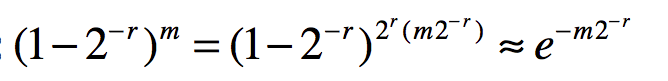

- if m >> $2^r$, then prob. tends to 0
- if m << $2^r$, then prob. tends to 1

> This means that $2^r$ will almost always be around m



# FINDING SIMILAR ITEMS
for instance, finding near-duplicate pages

---


### Many other problems can be expressed as finding “similar” sets, that is find near-neighbors in high-dimensional space   

#### Examples:

- Pages with similar words - For duplicate detection, classification by topic
- Customers who purchased similar products - Products with similar customer sets
- Images with similar features - Users who visited similar websites

## The problem could be stated as: 

$N$ data points  $x_1, x_2,...$ where each is high dimensional, and $N$ is big.

$x_i$ could be for instance, 

- large documents
- images
- structured data

Goal: 

- find all pairs of data where $d(x_i,x_j) < s$ where d is a distance measure;
- Naïve solution would take $O(N^2)$

## Jaccard Similarity and Distance of Sets

- Jaccard Similarity:

$$SIM(C1, C2) = \frac{|C1 ∩ C2|}{|C1 ∪ C2|}$$

- Jaccard Distance:

$$D(C1, C2) = 1-\frac{|C1 ∩ C2|}{|C1 ∪ C2|}$$


---


<img src="images/jaccard.png" style="width:60%"/>



### Naive Solution

For each element $x_i$ calculate the distance $d(x_i,x_j)$ to every other j elements.

This means $\frac{N(N-1)}{2}$ calculations


Suppose we need to apply this to N = 10 million registers


If each comparison takes $1\mu s$ it would take more than a year ....


##  Finding Similar Items Efficiently

Using only candidate pairs instead all N items we can strongly reduce the the naive approach to a-priori approach. Let us find a priori candidate pairs!



```
Shingling => Min-Hashing => Locality-Sensitive Hashing
```

<img src="images/lsh.png" style="width:60%"/>



#### Shingling 
- Convert documents to sets

Basic principle:

A document is a string of characters. Define a k-shingle for a document to be
any substring of length k found within the document.

> Considering the string D = "abcdabd", and we pick k = 2. Then the set of 2-shingles for D is D1 = {ab,bc,cd,da,bd}.

> k should be picked large enough that the probability of any given shingle appearing in any given document is low.

Thus, if our corpus of documents is emails, picking k = 5 should be fine. To see why, suppose that only letters and a general white-space character appear in emails (randomly). If so, then there would be $27^5 = 14,348,907$ possible shingles. Since the typical email is much smaller than 14 million characters long, we would expect k = 5 to work well, and indeed it does.

> but certain letters are use more than others....

A good rule of thumb is to imagine that there are only 20 characters (the most used ones) and estimate the number of k-shingles as $20^k$

Finally, instead of using substrings directly as shingles for instance 

$D1 = {ab,bc,cd,da,bd}$

we can pick a hash function that maps strings of length k to some number of buckets and treat the resulting bucket number as the shingle:

$h(D1) = \{1, 5, 7,4,2,0 \}$


Each document D can be represented as a binary (0 or 1) vector in the space of k-shingles

- Each unique shingle is a dimension
- Vectors are very sparse

> Documents that have lots of shingles in common have similar text, even if the text appears in different order - we can now measure the common shingles with **Jaccard Distance**.

If we use a binary vector with the k-shingles do define each document. we can use bitwise calculations:

- set intersection as bitwise AND
- set union as bitwise OR


C1 = 10111; 
C2 = 10011

- **Size of intersection** = 3; 
- **size of union** = 4,

- **Jaccard similarity (not distance)** = 3/4

- **Distance**: d(C1,C2) = 1 – (Jaccard similarity) = 1/4

#### Min-Hashing 

- Convert large sets to short signatures, while preserving similarity

So, we have a very sparse matrix of this form:

<img src="images/lsh_2.png" style="width:20%"/>

To solve this problem a naive approach would force us to compute all distances for all values of the matrix. We can try to find a signature whose similarity is equal to column similarity:


KEY IDEA:

“hash” each column C to a small signature h(C) such that:

- (1) h(C) is small enough that the signature fits in RAM
- sim(C1, C2) is the same as the “similarity” of signatures h(C1) and h(C2)

or at least, find a hash function h(·) such that:

- If sim(C1,C2) is high, then with high prob. h(C1) = h(C2)   
- If sim(C1,C2) is low, then with high prob. h(C1) ≠ h(C2)

> There is a suitable hash function for the Jaccard similarity: It is called Min-Hashing

1) Let's consider a random permutation $π$ of rows over the boolean spares matrix of shingles

2) Define “hash” function $h_π(C)$ the index of the first (in the permuted order $π$) row in which column C has value 1

3) Use several (e.g., 100) independent hash functions (that is, permutations) to create a signature of a column


<img src="images/minhashing_1.png" style="width:40%"/>


#### Why this is minhasshing is a good indicator for similarity?



#### In practice - Permuting rows even once is prohibitive



#### Locality-Sensitive Hashing (LSH)

- Focus on pairs of signatures likely to be from similar documents

Find documents with Jaccard similarity at least s (for some similarity threshold, e.g., s=0.8)


KEY IDEIA: Use a function f(x,y) that tells whether x and y is a candidate pair: a pair of elements whose similarity must be evaluated